In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout

# Define your UNet model architecture
def multi_unet_model(n_classes, image_height, image_width, image_channels):
    inputs = Input((image_height, image_width, image_channels))

    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Define parameters
image_height = 256
image_width = 256
image_channels = 3
n_classes = 6  # Update this with your actual number of classes

# Rebuild the model
model = multi_unet_model(n_classes, image_height, image_width, image_channels)

# Load the weights
model.load_weights('/content/drive/MyDrive/unet_model.h5')

# Print the model summary
#model.summary()


Image shape: (1, 256, 256, 3)


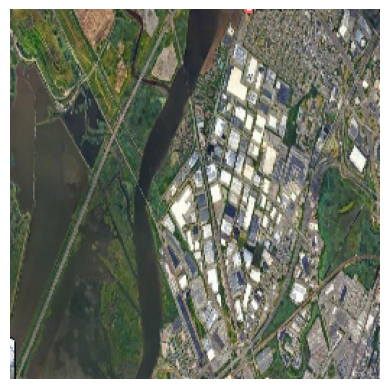

1/1 [==============================] - 2s 2s/step
Predicted class: [[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 3 ... 3 3 3]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


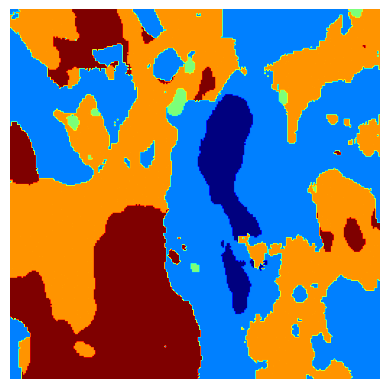

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your image
image_path = '/content/drive/MyDrive/original_satellite_img.png'  # Update this path to your image location

# Load the image with the target size
image = load_img(image_path, target_size=(256, 256))  # Adjust target size as per your model input size

# Convert the image to a numpy array
image_array = img_to_array(image)

# Normalize the image array if your model requires it
image_array = image_array / 255.0  # Assuming your model was trained on normalized images

# Expand dimensions to match the model input shape (batch size, height, width, channels)
image_array = np.expand_dims(image_array, axis=0)

# Print the shape to confirm
print("Image shape:", image_array.shape)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Make a prediction
prediction = model.predict(image_array)

# Process the prediction result if needed (e.g., argmax for classification, thresholding for segmentation)
predicted_class = np.argmax(prediction, axis=-1)

# Since the prediction result might be a batch, take the first element
predicted_class = predicted_class[0]

# Print the prediction result
print("Predicted class:", predicted_class)

# Visualize the prediction if it is a segmentation map
plt.imshow(predicted_class, cmap='jet')
plt.axis('off')
plt.show()


In [ ]:
# # # !pip install tensorflow==2.4.1 keras==2.4.3 segmentation-models==1.0.1
# # # import tensorflow as tf
# # from tensorflow.keras.utils import get_custom_objects
# # # # get_custom_objects().update(custom_objects)
# # # from tensorflow.keras import backend as K
# # !pip install -U segmentation_models
# # import segmentation_models as sm

# # Uninstall existing keras and tensorflow to avoid conflicts
# !pip uninstall -y keras tensorflow

# # Install specific compatible versions
# !pip install tensorflow==2.8.0 keras==2.8.0 segmentation_models

# # Restart the runtime (manually or programmatically)
# import os
# os.kill(os.getpid(), 9)

# # Import libraries after restart
# import tensorflow as tf
# from tensorflow.keras import backend as K
# import segmentation_models as sm



Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.8.0 which is incompatible.


In [13]:
!pip install --upgrade gradio

In [1]:
!pip install -U segmentation-models

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout
from matplotlib import pyplot as plt
import segmentation_models as sm

def jaccard_coef(y_true, y_pred):
    y_true_flatten = tf.keras.backend.flatten(y_true)
    y_pred_flatten = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (tf.keras.backend.sum(y_true_flatten) + tf.keras.backend.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

def multi_unet_model(n_classes, image_height, image_width, image_channels):
    inputs = Input((image_height, image_width, image_channels))

    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Define parameters
image_height = 256
image_width = 256
image_channels = 3
n_classes = 6  # Update this with your actual number of classes

# Rebuild the model
model = multi_unet_model(n_classes, image_height, image_width, image_channels)

# Load the weights
model.load_weights('/content/drive/MyDrive/unet_model.h5')

# Verify model summary
model.summary()

# Load and preprocess the image
image_path = '/content/drive/MyDrive/original_satellite_img.png'
image = Image.open(image_path).convert('RGB')
# image = image.resize((256, 256))
# image = np.array(image)
image = np.expand_dims(image, 0)

# Make predictions using the model
prediction = model.predict(image)

# Process the predicted image
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0, :, :]

# Display the images
plt.figure(figsize=(14, 8))

# Original image
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open(image_path))

# Predicted image
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

plt.show()

# Verify the type of predicted_image
print(type(predicted_image))


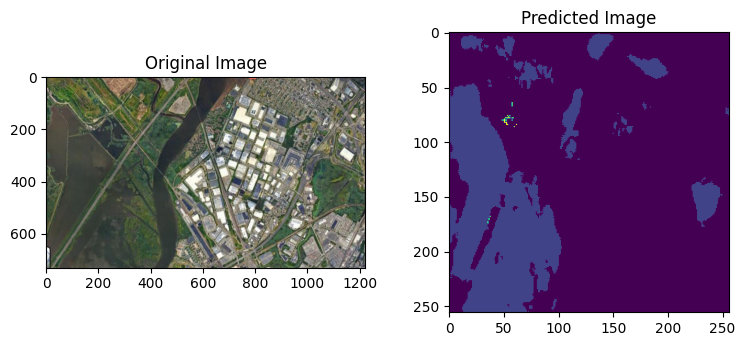

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('/content/drive/MyDrive/original_satellite_img.png'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [ ]:
def process_input_image(image_source):
  image = np.expand_dims(image_source, 0)

  prediction = satellite_model.predict(image)
  predicted_image = np.argmax(prediction, axis=3)

  predicted_image = predicted_image[0,:,:]
  predicted_image = predicted_image * 50
  return 'Predicted Masked Image', predicted_image

In [ ]:

my_app = gr.Blocks()

In [ ]:
with my_app:
  gr.Markdown("Satellite Image Segmentation Application UI with Gradio")
  with gr.Tabs():
    with gr.TabItem("Select your image"):
      with gr.Row():
        with gr.Column():
            img_source = gr.Image(label="Please select source Image", image_mode="RGB")
            source_image_loader = gr.Button("Load above Image")
        with gr.Column():
            output_label = gr.Label(label="Image Info")
            img_output = gr.Image(label="Image Output", image_mode="RGB")
    source_image_loader.click(
        process_input_image,
        [
            img_source
        ],
        [
            output_label,
            img_output
        ]
    )


In [1]:

my_app.launch(debug=True)


In [ ]:
my_app.close()

# **APP FOR PROJECT**

In [28]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout
import segmentation_models as sm
import gradio as gr

def jaccard_coef(y_true, y_pred):
    y_true_flatten = tf.keras.backend.flatten(y_true)
    y_pred_flatten = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (tf.keras.backend.sum(y_true_flatten) + tf.keras.backend.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

def multi_unet_model(n_classes, image_height, image_width, image_channels):
    inputs = Input((image_height, image_width, image_channels))

    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Define parameters
image_height = 256
image_width = 256
image_channels = 3
n_classes = 6  # Update this with your actual number of classes

# Rebuild the model
model = multi_unet_model(n_classes, image_height, image_width, image_channels)

# Load the weights
model.load_weights('/content/drive/MyDrive/unet_model.h5')

# Verify model summary
model.summary()

# Define class labels and colors
class_labels = {
    'Building': '#3C1098',
    'Land': '#8429F6',
    'Road': '#6EC1E4',
    'Vegetation': '#FEDD3A',
    'Water': '#E2A929',
    'Unlabeled': '#9B9B9B'
}

class_colors = {k: tuple(int(v.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)) for k, v in class_labels.items()}


# Function to process and predict the image
def process_image(image):
    image = image.convert('RGB')
    image = image.resize((256, 256))
    image = np.array(image)
    image = np.expand_dims(image, 0)

    prediction = model.predict(image)

    predicted_image = np.argmax(prediction, axis=3)
    predicted_image = predicted_image[0, :, :]

    # Create a color mask for the predicted image
    predicted_img = Image.new("RGB", (256, 256))
    pixels = predicted_img.load()
    for i in range(256):
        for j in range(256):
            class_idx = predicted_image[i, j]
            class_name = list(class_labels.keys())[class_idx]
            pixels[j, i] = class_colors[class_name]

    return predicted_img

def get_class_info():
    class_info = {class_name: color for class_name, color in class_labels.items()}
    return class_info

def infer(image):
    processed_image = process_image(image)
    class_info = get_class_info()
    return processed_image, class_info

interface = gr.Interface(
    fn=infer,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Image(type="pil"), gr.JSON()],
    title="Satellite Image Segmentation",
    description="Drop an image to get the segmented output and class information."
)

interface.launch(debug=True)


Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_437 (Conv2D)            (None, 256, 256, 16  448         ['input_24[0][0]']               
                                )                                                                 
                                                                                                  
 dropout_207 (Dropout)          (None, 256, 256, 16  0           ['conv2d_437[0][0]']             
                                )                                                          

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5970f3ea4e310cbfea.gradio.live


In [34]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout
import segmentation_models as sm
import gradio as gr

def jaccard_coef(y_true, y_pred):
    y_true_flatten = tf.keras.backend.flatten(y_true)
    y_pred_flatten = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (tf.keras.backend.sum(y_true_flatten) + tf.keras.backend.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

def multi_unet_model(n_classes, image_height, image_width, image_channels):
    inputs = Input((image_height, image_width, image_channels))

    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Define parameters
image_height = 256
image_width = 256
image_channels = 3
n_classes = 6  # Update this with your actual number of classes

# Rebuild the model
model = multi_unet_model(n_classes, image_height, image_width, image_channels)

# Load the weights
model.load_weights('/content/drive/MyDrive/unet_model.h5')

# Verify model summary
model.summary()

# Define class labels and colors
class_labels = {
    'Building': '#3C1098',
    'Land': '#8429F6',
    'Road': '#6EC1E4',
    'Vegetation': '#FEDD3A',
    'Water': '#E2A929',
    'Unlabeled': '#9B9B9B'
}

class_colors = {k: tuple(int(v.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)) for k, v in class_labels.items()}

# req
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict

from PIL import Image

def segment_image(predicted_image, class_colors):

    # Convert predicted image to numpy array
    img_array = np.array(predicted_image)

    # Reshape the image array to (N, 3) where N is the number of pixels and 3 for RGB values
    reshaped_img_array = img_array.reshape(-1, 3)

    # Use K-Means clustering to segment the image into distinct regions
    kmeans = KMeans(n_clusters=len(class_colors), random_state=0).fit(reshaped_img_array)

    # Extract cluster centers as representative colors
    cluster_centers = kmeans.cluster_centers_

    # Initialize dictionary to store segment information
    segment_info = defaultdict(list)

    # Assign each pixel to its corresponding cluster
    for idx, label in enumerate(kmeans.labels_):
        segment_info[label].append(tuple(reshaped_img_array[idx]))

    # Map each cluster center to the closest class color
    class_labels = list(class_colors.keys())
    for cluster_center in cluster_centers:
        min_distance = float('inf')
        closest_class = None
        for class_label, class_color in class_colors.items():
            distance = np.linalg.norm(cluster_center - np.array(class_color))
            if distance < min_distance:
                min_distance = distance
                closest_class = class_label
        # Add the segment to the corresponding class label
        segment_info[closest_class].append(cluster_center.astype(int))

    # Create a new blank image to draw the segmented regions
    segmented_img = Image.new("RGB", (256, 256))
    pixels = segmented_img.load()

    # Assign colors to each segment
    for class_name, class_color in class_colors.items():
        for segment in segment_info[class_name]:
            for i in range(256):
                for j in range(256):
                    pixels[j, i] = tuple(segment)

    return segmented_img


def process_image(image):
    if image is None:
        raise ValueError("Input image is None")

    # Convert the input image to RGB if it's not already in RGB format
    if image.mode != "RGB":
        image = image.convert("RGB")

    # Resize the image to the desired dimensions
    image_resized = image.resize((256, 256))

    # Convert the resized image to a numpy array
    image_array = np.array(image_resized)

    # Expand dimensions to match the expected input shape of the model
    image_array = np.expand_dims(image_array, 0)

    # Predict the segmentation mask using the model
    prediction = model.predict(image_array)

    # Convert the prediction to a segmented image
    predicted_image = np.argmax(prediction, axis=3)[0]

    # Create a color mask for the predicted image
    predicted_img = Image.new("RGB", (256, 256))
    pixels = predicted_img.load()
    for i in range(256):
        for j in range(256):
            class_idx = predicted_image[i, j]
            class_name = list(class_labels.keys())[class_idx]
            pixels[j, i] = class_colors[class_name]

    return predicted_img



def get_class_info():
    class_info = {class_name: color for class_name, color in class_labels.items()}
    return class_info

def infer(image):
    if image is None:
        raise ValueError("Input image is None")

    processed_image = process_image(image)
    class_info = get_class_info()
    return processed_image, class_info


interface = gr.Interface(
    fn=infer,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Image(type="pil"), gr.JSON()],
    title="Satellite Image Segmentation",
    description="Drop an image to get the segmented output and class information."
)

interface.launch(debug=True)


Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_551 (Conv2D)            (None, 256, 256, 16  448         ['input_30[0][0]']               
                                )                                                                 
                                                                                                  
 dropout_261 (Dropout)          (None, 256, 256, 16  0           ['conv2d_551[0][0]']             
                                )                                                          

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f65afb00fed832041c.gradio.live
